# EDS6340 - Introduction to Data Science - Project Phase 2

## Group 10
Achanta, Sai Praneeth | 2302324 <br>
Montanez, Derek N | 1920577 <br>
Sai Kiran Anugam | 2312298 <br>
Sandeep Kokkula | 2102358 <br>
Seelam, Gayathri | 2297215 <br>
Venkata Kaushik Belusonti | 2284811

## Step 5: Feature selection step 2 also build (Based on the models compatibility with the data i.e classification or regression problem)

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning models
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
import statsmodels.api as sm


### Review the cleaned dataset from Phase 2

In [ ]:
# Read the clean dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/Secondary_Mushroom_Dataset/Group_10_Data_Cleaning.csv")
df = df.drop(['Unnamed: 0'], axis = 1)
# Display the first few tuples of the dataset
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,2.340396,6,2,6,0,2,10,2.409448,0.675929,11,1,2,0,3
1,1,2.340396,6,2,6,0,2,10,2.409448,0.812813,11,1,2,0,2
2,1,2.053072,6,2,6,0,2,10,2.409448,0.756815,11,1,2,0,3
3,1,2.079925,2,3,1,0,2,10,2.409448,0.537799,11,1,5,0,3
4,1,2.206132,6,3,6,0,2,10,2.409448,0.689617,11,1,5,0,3


In [ ]:
# Display the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60923 entries, 0 to 60922
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60923 non-null  int64  
 1   cap-diameter          60923 non-null  float64
 2   cap-shape             60923 non-null  int64  
 3   cap-surface           60923 non-null  int64  
 4   cap-color             60923 non-null  int64  
 5   does-bruise-or-bleed  60923 non-null  int64  
 6   gill-attachment       60923 non-null  int64  
 7   gill-color            60923 non-null  int64  
 8   stem-height           60923 non-null  float64
 9   stem-width            60923 non-null  float64
 10  stem-color            60923 non-null  int64  
 11  has-ring              60923 non-null  int64  
 12  ring-type             60923 non-null  int64  
 13  habitat               60923 non-null  int64  
 14  season                60923 non-null  int64  
dtypes: float64(3), int6

#### Split the features into predicted features and target feature

In [ ]:
# Split the features to predicted (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

#### Dataset splitted to Train (80%) and Test (20%)

In [ ]:
# Split the dataset into train and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Read the data from pickles
X_train = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/ipynb_Files/dummy_Xtrain.pkl")
X_test = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/ipynb_Files/dummy_Xtest.pkl")
y_train = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/ipynb_Files/dummy_ytrain.pkl")
y_test = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/ipynb_Files/dummy_ytest.pkl")
X_train_selected = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/ipynb_Files/dummy_Xtrain_selected.pkl")
X_test_selected = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/ipynb_Files/dummy_Xtest_selected.pkl")

### Define functions to estimate the performance metrics


In [ ]:
# Function for perfromance metric of data
def Perf_Metric(Actual_Ouput, Prediction_Output):
  # Actual_Ouput is the actual output of training data taken from the dataset
  # TrainData_Prediction is the predicted output from the model for the training data
  Accuracy = round(accuracy_score(Actual_Ouput, Prediction_Output),3)
  F1Score = round(f1_score(Actual_Ouput, Prediction_Output),3)
  Precision = round(precision_score(Actual_Ouput, Prediction_Output),3)
  Recall = round(recall_score(Actual_Ouput, Prediction_Output),3)
  return [Accuracy, F1Score, Precision, Recall]

In [ ]:
# Get the training and test data for the selected features from Lasso
X_train_selected
X_test_selected

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,stem-width,stem-color,has-ring,ring-type,habitat,season
2980,1.913438,4,10,0,0.896189,6,1,4,0,0
12959,-1.373326,6,11,0,-1.270323,11,0,1,0,0
6920,-0.621452,6,4,0,-0.523679,9,0,1,3,0
15692,-0.132734,6,5,1,0.227942,11,0,1,0,0
19080,-0.441539,6,6,0,-0.496302,7,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...
50807,-0.855070,6,5,0,-0.298442,6,0,1,0,0
55360,-0.489874,3,5,0,2.286191,6,0,1,0,3
8543,-0.100510,6,5,0,-0.124225,6,0,1,3,0
19373,-0.693954,6,11,0,-0.659320,7,0,1,1,0


# Performing few more machine learning model training

XG Boost

In [ ]:
# Fit the model from taining data using XG Boost
xgb_model = XGBClassifier(n_estimators=1000 ,random_state=42)
xgb = xgb_model.fit(X_train_selected, y_train)

# Model fit with training data
y_train_predict = xgb.predict(X_train_selected)
# Make predictions on the test data
y_pred = xgb.predict(X_test_selected)

# Evaluate performance metrics
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

XGB_Train_PM = Train_PM
XGB_Test_PM = Test_PM

# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['Logistic Regression'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.999,0.999,0.999,0.999
1,Test,0.976,0.979,0.979,0.978


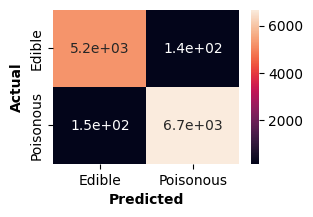

In [ ]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

## Extreme Machine Larning Model

#### Extreme ML Model is a Deep Learning model that consists of two or more hidden layers. The deeper the model (number of layers) the model has, the better the model is at learning the dataset. The model has an input layer that takes in the newly shaped independent variables, and a single output neuron that decides the binary classification.

In [ ]:
!pip install scikeras
from tensorflow.keras import models, datasets, layers, optimizers
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasClassifier

# Function to build ann model
def build_ann():
  # creating the layers of the NN
  ann = models.Sequential()
  ann.add(layers.Input(shape=(len(X_train_selected.columns), )))
  ann.add(layers.Dense(units=56, activation='relu'))
  ann.add(layers.Dense(units=128, activation='relu'))
  ann.add(layers.Dense(units=256, activation='relu'))
  ann.add(layers.Dense(units=128, activation='relu'))
  ann.add(layers.Dense(units=56, activation='relu'))
  ann.add(layers.Dense(units=1, activation='sigmoid'))
  ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return ann

model = KerasClassifier(build_fn=build_ann)
# Set params to test for in GridSeach
params={'batch_size':[200, 250],
        'epochs':[15, 20, 25]
        }

# Instantiate the RandomizedSearchCV object:
random_search_ann = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter = 4)

# Fit trained dataset with the best seeacrh
random_search_ann.fit(X_train_selected, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
195/195 [==============================] - 3s 7ms/step - loss: 0.5723 - accuracy: 0.6832
Epoch 2/20
195/195 [==============================] - 1s 7ms/step - loss: 0.4163 - accuracy: 0.7877
Epoch 3/20
195/195 [==============================] - 1s 7ms/step - loss: 0.3030 - accuracy: 0.8560
Epoch 4/20
195/195 [==============================] - 2s 11ms/step - loss: 0.2452 - accuracy: 0.8892
Epoch 5/20
195/195 [==============================] - 2s 11ms/step - loss: 0.2108 - accuracy: 0.9105
Epoch 6/20
195/195 [==============================] - 2s 11ms/step - loss: 0.1920 - accuracy: 0.9192
Epoch 7/20
195/195 [==============================] - 2s 10ms/step - loss: 0.1661 - accuracy: 0.9334
Epoch 8/20
195/195 [==============================] - 2s 11ms/step - loss: 0.1596 - accuracy: 0.9336
Epoch 9/20
195/195 [==============================] - 2s 11ms/step - loss: 0.1386 - accuracy: 0.9452
Epoch 10/20
195/195 [==============================] - 2s 10ms/step - loss: 0.1310 - accuracy:

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 3s 7ms/step - loss: 0.5480 - accuracy: 0.6985
Epoch 2/20
195/195 [==============================] - 2s 9ms/step - loss: 0.3725 - accuracy: 0.8147
Epoch 3/20
195/195 [==============================] - 2s 11ms/step - loss: 0.2843 - accuracy: 0.8685
Epoch 4/20
195/195 [==============================] - 2s 11ms/step - loss: 0.2335 - accuracy: 0.8947
Epoch 5/20
195/195 [==============================] - 2s 11ms/step - loss: 0.2082 - accuracy: 0.9092
Epoch 6/20
195/195 [==============================] - 2s 8ms/step - loss: 0.1915 - accuracy: 0.9195
Epoch 7/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1702 - accuracy: 0.9298
Epoch 8/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1520 - accuracy: 0.9390
Epoch 9/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1504 - accuracy: 0.9388
Epoch 10/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1337 - accuracy: 0.9478
Epoch 1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 3s 7ms/step - loss: 0.5459 - accuracy: 0.6998
Epoch 2/20
195/195 [==============================] - 2s 8ms/step - loss: 0.3699 - accuracy: 0.8210
Epoch 3/20
195/195 [==============================] - 2s 11ms/step - loss: 0.2721 - accuracy: 0.8760
Epoch 4/20
195/195 [==============================] - 2s 11ms/step - loss: 0.2299 - accuracy: 0.9007
Epoch 5/20
195/195 [==============================] - 2s 11ms/step - loss: 0.1995 - accuracy: 0.9162
Epoch 6/20
195/195 [==============================] - 2s 9ms/step - loss: 0.1777 - accuracy: 0.9268
Epoch 7/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1623 - accuracy: 0.9348
Epoch 8/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1451 - accuracy: 0.9418
Epoch 9/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1375 - accuracy: 0.9470
Epoch 10/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1290 - accuracy: 0.9503
Epoch 1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 3s 7ms/step - loss: 0.5499 - accuracy: 0.6954
Epoch 2/20
195/195 [==============================] - 2s 8ms/step - loss: 0.3837 - accuracy: 0.8086
Epoch 3/20
195/195 [==============================] - 2s 11ms/step - loss: 0.2989 - accuracy: 0.8618
Epoch 4/20
195/195 [==============================] - 2s 11ms/step - loss: 0.2521 - accuracy: 0.8876
Epoch 5/20
195/195 [==============================] - 2s 11ms/step - loss: 0.2144 - accuracy: 0.9072
Epoch 6/20
195/195 [==============================] - 2s 9ms/step - loss: 0.1977 - accuracy: 0.9147
Epoch 7/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1738 - accuracy: 0.9274
Epoch 8/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1556 - accuracy: 0.9347
Epoch 9/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1437 - accuracy: 0.9440
Epoch 10/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1310 - accuracy: 0.9484
Epoch 1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
195/195 [==============================] - 3s 7ms/step - loss: 0.5417 - accuracy: 0.7056
Epoch 2/20
195/195 [==============================] - 1s 7ms/step - loss: 0.3581 - accuracy: 0.8274
Epoch 3/20
195/195 [==============================] - 1s 7ms/step - loss: 0.2697 - accuracy: 0.8781
Epoch 4/20
195/195 [==============================] - 1s 7ms/step - loss: 0.2306 - accuracy: 0.8985
Epoch 5/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1923 - accuracy: 0.9177
Epoch 6/20
195/195 [==============================] - 1s 6ms/step - loss: 0.1843 - accuracy: 0.9226
Epoch 7/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1603 - accuracy: 0.9336
Epoch 8/20
195/195 [==============================] - 2s 10ms/step - loss: 0.1480 - accuracy: 0.9405
Epoch 9/20
195/195 [==============================] - 2s 11ms/step - loss: 0.1326 - accuracy: 0.9481
Epoch 10/20
195/195 [==============================] - 2s 11ms/step - loss: 0.1327 - accuracy: 0.9

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 3s 7ms/step - loss: 0.5636 - accuracy: 0.6893
Epoch 2/25
195/195 [==============================] - 2s 10ms/step - loss: 0.3937 - accuracy: 0.8072
Epoch 3/25
195/195 [==============================] - 2s 11ms/step - loss: 0.2865 - accuracy: 0.8695
Epoch 4/25
195/195 [==============================] - 2s 11ms/step - loss: 0.2435 - accuracy: 0.8933
Epoch 5/25
195/195 [==============================] - 2s 9ms/step - loss: 0.2011 - accuracy: 0.9149
Epoch 6/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1958 - accuracy: 0.9155
Epoch 7/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1746 - accuracy: 0.9288
Epoch 8/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1544 - accuracy: 0.9389
Epoch 9/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1381 - accuracy: 0.9453
Epoch 10/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1345 - accuracy: 0.9475
Epoch 1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
195/195 [==============================] - 6s 16ms/step - loss: 0.5632 - accuracy: 0.6899
Epoch 2/25
195/195 [==============================] - 2s 11ms/step - loss: 0.3923 - accuracy: 0.8082
Epoch 3/25
195/195 [==============================] - 2s 10ms/step - loss: 0.2906 - accuracy: 0.8673
Epoch 4/25
195/195 [==============================] - 2s 10ms/step - loss: 0.2388 - accuracy: 0.8972
Epoch 5/25
195/195 [==============================] - 2s 9ms/step - loss: 0.2053 - accuracy: 0.9141
Epoch 6/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1849 - accuracy: 0.9233
Epoch 7/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1659 - accuracy: 0.9326
Epoch 8/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1494 - accuracy: 0.9400
Epoch 9/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1408 - accuracy: 0.9443
Epoch 10/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1279 - accuracy: 0.

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
195/195 [==============================] - 4s 10ms/step - loss: 0.5679 - accuracy: 0.6831
Epoch 2/25
195/195 [==============================] - 1s 7ms/step - loss: 0.4083 - accuracy: 0.7934
Epoch 3/25
195/195 [==============================] - 1s 7ms/step - loss: 0.3014 - accuracy: 0.8614
Epoch 4/25
195/195 [==============================] - 1s 7ms/step - loss: 0.2425 - accuracy: 0.8943
Epoch 5/25
195/195 [==============================] - 1s 7ms/step - loss: 0.2102 - accuracy: 0.9087
Epoch 6/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1840 - accuracy: 0.9235
Epoch 7/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1635 - accuracy: 0.9342
Epoch 8/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1535 - accuracy: 0.9391
Epoch 9/25
195/195 [==============================] - 2s 11ms/step - loss: 0.1387 - accuracy: 0.9442
Epoch 10/25
195/195 [==============================] - 2s 11ms/step - loss: 0.1238 - accuracy: 0.9

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 3s 7ms/step - loss: 0.5540 - accuracy: 0.6926
Epoch 2/25
195/195 [==============================] - 1s 7ms/step - loss: 0.3578 - accuracy: 0.8247
Epoch 3/25
195/195 [==============================] - 1s 7ms/step - loss: 0.2643 - accuracy: 0.8801
Epoch 4/25
195/195 [==============================] - 1s 7ms/step - loss: 0.2163 - accuracy: 0.9069
Epoch 5/25
195/195 [==============================] - 2s 10ms/step - loss: 0.1932 - accuracy: 0.9191
Epoch 6/25
195/195 [==============================] - 2s 11ms/step - loss: 0.1693 - accuracy: 0.9304
Epoch 7/25
195/195 [==============================] - 2s 11ms/step - loss: 0.1571 - accuracy: 0.9358
Epoch 8/25
195/195 [==============================] - 2s 10ms/step - loss: 0.1460 - accuracy: 0.9416
Epoch 9/25
195/195 [==============================] - 1s 6ms/step - loss: 0.1346 - accuracy: 0.9462
Epoch 10/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1198 - accuracy: 0.9541
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 3s 10ms/step - loss: 0.5634 - accuracy: 0.6870
Epoch 2/25
195/195 [==============================] - 2s 11ms/step - loss: 0.3906 - accuracy: 0.8087
Epoch 3/25
195/195 [==============================] - 2s 11ms/step - loss: 0.2844 - accuracy: 0.8705
Epoch 4/25
195/195 [==============================] - 2s 10ms/step - loss: 0.2245 - accuracy: 0.9020
Epoch 5/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1964 - accuracy: 0.9164
Epoch 6/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1688 - accuracy: 0.9300
Epoch 7/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1522 - accuracy: 0.9380
Epoch 8/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1439 - accuracy: 0.9431
Epoch 9/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1316 - accuracy: 0.9481
Epoch 10/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1283 - accuracy: 0.9490
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 3s 7ms/step - loss: 0.5879 - accuracy: 0.6679
Epoch 2/15
195/195 [==============================] - 1s 7ms/step - loss: 0.4200 - accuracy: 0.7913
Epoch 3/15
195/195 [==============================] - 1s 7ms/step - loss: 0.3111 - accuracy: 0.8546
Epoch 4/15
195/195 [==============================] - 1s 7ms/step - loss: 0.2544 - accuracy: 0.8851
Epoch 5/15
195/195 [==============================] - 1s 7ms/step - loss: 0.2274 - accuracy: 0.9006
Epoch 6/15
195/195 [==============================] - 1s 8ms/step - loss: 0.1991 - accuracy: 0.9163
Epoch 7/15
195/195 [==============================] - 2s 11ms/step - loss: 0.1819 - accuracy: 0.9243
Epoch 8/15
195/195 [==============================] - 2s 11ms/step - loss: 0.1615 - accuracy: 0.9343
Epoch 9/15
195/195 [==============================] - 2s 11ms/step - loss: 0.1539 - accuracy: 0.9372
Epoch 10/15
195/195 [==============================] - 2s 9ms/step - loss: 0.1421 - accuracy: 0.9435
Epoch 1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
195/195 [==============================] - 4s 11ms/step - loss: 0.5444 - accuracy: 0.7020
Epoch 2/15
195/195 [==============================] - 2s 9ms/step - loss: 0.3609 - accuracy: 0.8252
Epoch 3/15
195/195 [==============================] - 1s 7ms/step - loss: 0.2685 - accuracy: 0.8812
Epoch 4/15
195/195 [==============================] - 1s 7ms/step - loss: 0.2253 - accuracy: 0.9002
Epoch 5/15
195/195 [==============================] - 1s 7ms/step - loss: 0.2024 - accuracy: 0.9138
Epoch 6/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1756 - accuracy: 0.9260
Epoch 7/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1614 - accuracy: 0.9337
Epoch 8/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1457 - accuracy: 0.9428
Epoch 9/15
195/195 [==============================] - 2s 8ms/step - loss: 0.1381 - accuracy: 0.9461
Epoch 10/15
195/195 [==============================] - 2s 11ms/step - loss: 0.1287 - accuracy: 0.94

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 3s 7ms/step - loss: 0.5531 - accuracy: 0.6930
Epoch 2/15
195/195 [==============================] - 1s 7ms/step - loss: 0.3737 - accuracy: 0.8197
Epoch 3/15
195/195 [==============================] - 1s 7ms/step - loss: 0.2726 - accuracy: 0.8763
Epoch 4/15
195/195 [==============================] - 2s 10ms/step - loss: 0.2271 - accuracy: 0.9008
Epoch 5/15
195/195 [==============================] - 2s 11ms/step - loss: 0.1960 - accuracy: 0.9188
Epoch 6/15
195/195 [==============================] - 2s 11ms/step - loss: 0.1789 - accuracy: 0.9253
Epoch 7/15
195/195 [==============================] - 2s 10ms/step - loss: 0.1594 - accuracy: 0.9355
Epoch 8/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1497 - accuracy: 0.9404
Epoch 9/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1393 - accuracy: 0.9453
Epoch 10/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1271 - accuracy: 0.9494
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
195/195 [==============================] - 4s 11ms/step - loss: 0.5637 - accuracy: 0.6855
Epoch 2/15
195/195 [==============================] - 1s 8ms/step - loss: 0.4111 - accuracy: 0.7923
Epoch 3/15
195/195 [==============================] - 1s 7ms/step - loss: 0.2985 - accuracy: 0.8620
Epoch 4/15
195/195 [==============================] - 1s 7ms/step - loss: 0.2457 - accuracy: 0.8933
Epoch 5/15
195/195 [==============================] - 1s 7ms/step - loss: 0.2010 - accuracy: 0.9149
Epoch 6/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1942 - accuracy: 0.9172
Epoch 7/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1715 - accuracy: 0.9293
Epoch 8/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1508 - accuracy: 0.9392
Epoch 9/15
195/195 [==============================] - 2s 9ms/step - loss: 0.1393 - accuracy: 0.9459
Epoch 10/15
195/195 [==============================] - 2s 11ms/step - loss: 0.1303 - accuracy: 0.94

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 4s 9ms/step - loss: 0.5698 - accuracy: 0.6837
Epoch 2/15
195/195 [==============================] - 2s 11ms/step - loss: 0.4057 - accuracy: 0.8004
Epoch 3/15
195/195 [==============================] - 2s 11ms/step - loss: 0.2982 - accuracy: 0.8639
Epoch 4/15
195/195 [==============================] - 2s 11ms/step - loss: 0.2373 - accuracy: 0.8970
Epoch 5/15
195/195 [==============================] - 2s 9ms/step - loss: 0.2024 - accuracy: 0.9149
Epoch 6/15
195/195 [==============================] - 1s 8ms/step - loss: 0.1741 - accuracy: 0.9276
Epoch 7/15
195/195 [==============================] - 1s 8ms/step - loss: 0.1618 - accuracy: 0.9357
Epoch 8/15
195/195 [==============================] - 2s 8ms/step - loss: 0.1452 - accuracy: 0.9400
Epoch 9/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1365 - accuracy: 0.9464
Epoch 10/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1221 - accuracy: 0.9517
Epoch 1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


156/156 [==============================] - 2s 8ms/step - loss: 0.5766 - accuracy: 0.6735
Epoch 2/15
156/156 [==============================] - 1s 8ms/step - loss: 0.4085 - accuracy: 0.7976
Epoch 3/15
156/156 [==============================] - 1s 7ms/step - loss: 0.3096 - accuracy: 0.8567
Epoch 4/15
156/156 [==============================] - 1s 8ms/step - loss: 0.2542 - accuracy: 0.8879
Epoch 5/15
156/156 [==============================] - 1s 8ms/step - loss: 0.2163 - accuracy: 0.9071
Epoch 6/15
156/156 [==============================] - 1s 8ms/step - loss: 0.1950 - accuracy: 0.9167
Epoch 7/15
156/156 [==============================] - 2s 10ms/step - loss: 0.1801 - accuracy: 0.9252
Epoch 8/15
156/156 [==============================] - 2s 13ms/step - loss: 0.1642 - accuracy: 0.9324
Epoch 9/15
156/156 [==============================] - 2s 13ms/step - loss: 0.1542 - accuracy: 0.9362
Epoch 10/15
156/156 [==============================] - 2s 13ms/step - loss: 0.1385 - accuracy: 0.9454
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
156/156 [==============================] - 4s 13ms/step - loss: 0.5634 - accuracy: 0.6869
Epoch 2/15
156/156 [==============================] - 2s 10ms/step - loss: 0.3907 - accuracy: 0.8080
Epoch 3/15
156/156 [==============================] - 1s 8ms/step - loss: 0.2999 - accuracy: 0.8592
Epoch 4/15
156/156 [==============================] - 1s 8ms/step - loss: 0.2376 - accuracy: 0.8953
Epoch 5/15
156/156 [==============================] - 1s 8ms/step - loss: 0.2063 - accuracy: 0.9113
Epoch 6/15
156/156 [==============================] - 1s 8ms/step - loss: 0.1815 - accuracy: 0.9235
Epoch 7/15
156/156 [==============================] - 1s 8ms/step - loss: 0.1615 - accuracy: 0.9352
Epoch 8/15
156/156 [==============================] - 1s 8ms/step - loss: 0.1490 - accuracy: 0.9404
Epoch 9/15
156/156 [==============================] - 1s 8ms/step - loss: 0.1402 - accuracy: 0.9451
Epoch 10/15
156/156 [==============================] - 1s 9ms/step - loss: 0.1352 - accuracy: 0.94

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


156/156 [==============================] - 3s 8ms/step - loss: 0.5567 - accuracy: 0.6901
Epoch 2/15
156/156 [==============================] - 1s 8ms/step - loss: 0.4114 - accuracy: 0.7954
Epoch 3/15
156/156 [==============================] - 1s 8ms/step - loss: 0.3104 - accuracy: 0.8575
Epoch 4/15
156/156 [==============================] - 1s 8ms/step - loss: 0.2547 - accuracy: 0.8883
Epoch 5/15
156/156 [==============================] - 1s 8ms/step - loss: 0.2236 - accuracy: 0.9037
Epoch 6/15
156/156 [==============================] - 2s 11ms/step - loss: 0.1967 - accuracy: 0.9146
Epoch 7/15
156/156 [==============================] - 2s 13ms/step - loss: 0.1773 - accuracy: 0.9254
Epoch 8/15
156/156 [==============================] - 2s 12ms/step - loss: 0.1578 - accuracy: 0.9366
Epoch 9/15
156/156 [==============================] - 2s 12ms/step - loss: 0.1405 - accuracy: 0.9448
Epoch 10/15
156/156 [==============================] - 2s 10ms/step - loss: 0.1372 - accuracy: 0.9454
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


156/156 [==============================] - 2s 7ms/step - loss: 0.5742 - accuracy: 0.6821
Epoch 2/15
156/156 [==============================] - 2s 10ms/step - loss: 0.4119 - accuracy: 0.7969
Epoch 3/15
156/156 [==============================] - 2s 12ms/step - loss: 0.2981 - accuracy: 0.8621
Epoch 4/15
156/156 [==============================] - 2s 13ms/step - loss: 0.2398 - accuracy: 0.8941
Epoch 5/15
156/156 [==============================] - 2s 13ms/step - loss: 0.2215 - accuracy: 0.9047
Epoch 6/15
156/156 [==============================] - 2s 10ms/step - loss: 0.1836 - accuracy: 0.9243
Epoch 7/15
156/156 [==============================] - 1s 7ms/step - loss: 0.1650 - accuracy: 0.9327
Epoch 8/15
156/156 [==============================] - 1s 8ms/step - loss: 0.1494 - accuracy: 0.9408
Epoch 9/15
156/156 [==============================] - 1s 8ms/step - loss: 0.1507 - accuracy: 0.9394
Epoch 10/15
156/156 [==============================] - 1s 7ms/step - loss: 0.1294 - accuracy: 0.9499
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


156/156 [==============================] - 2s 7ms/step - loss: 0.5757 - accuracy: 0.6760
Epoch 2/15
156/156 [==============================] - 1s 7ms/step - loss: 0.4012 - accuracy: 0.8026
Epoch 3/15
156/156 [==============================] - 1s 8ms/step - loss: 0.3001 - accuracy: 0.8599
Epoch 4/15
156/156 [==============================] - 1s 8ms/step - loss: 0.2428 - accuracy: 0.8927
Epoch 5/15
156/156 [==============================] - 1s 8ms/step - loss: 0.2180 - accuracy: 0.9040
Epoch 6/15
156/156 [==============================] - 2s 12ms/step - loss: 0.1923 - accuracy: 0.9170
Epoch 7/15
156/156 [==============================] - 2s 12ms/step - loss: 0.1794 - accuracy: 0.9248
Epoch 8/15
156/156 [==============================] - 2s 12ms/step - loss: 0.1641 - accuracy: 0.9321
Epoch 9/15
156/156 [==============================] - 2s 12ms/step - loss: 0.1483 - accuracy: 0.9394
Epoch 10/15
156/156 [==============================] - 1s 9ms/step - loss: 0.1399 - accuracy: 0.9450
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
244/244 [==============================] - 3s 7ms/step - loss: 0.5290 - accuracy: 0.7139
Epoch 2/25
244/244 [==============================] - 2s 7ms/step - loss: 0.3382 - accuracy: 0.8389
Epoch 3/25
244/244 [==============================] - 2s 7ms/step - loss: 0.2449 - accuracy: 0.8909
Epoch 4/25
244/244 [==============================] - 2s 7ms/step - loss: 0.2058 - accuracy: 0.9108
Epoch 5/25
244/244 [==============================] - 2s 7ms/step - loss: 0.1790 - accuracy: 0.9257
Epoch 6/25
244/244 [==============================] - 2s 9ms/step - loss: 0.1619 - accuracy: 0.9347
Epoch 7/25
244/244 [==============================] - 3s 11ms/step - loss: 0.1387 - accuracy: 0.9466
Epoch 8/25
244/244 [==============================] - 3s 11ms/step - loss: 0.1306 - accuracy: 0.9481
Epoch 9/25
244/244 [==============================] - 2s 9ms/step - loss: 0.1217 - accuracy: 0.9518
Epoch 10/25
244/244 [==============================] - 2s 7ms/step - loss: 0.1129 - accuracy: 0.95

RandomizedSearchCV(estimator=KerasClassifier(build_fn=<function build_ann at 0x7ab5946235b0>),
                   n_iter=4,
                   param_distributions={'batch_size': [200, 250],
                                        'epochs': [15, 20, 25]})

In [ ]:
# Get the best ANN parameters
params = random_search_ann.best_params_
params

{'epochs': 25, 'batch_size': 200}

In [ ]:
# Best ANN estimator
estimator = random_search_ann.best_estimator_
estimator

KerasClassifier(
	model=None
	build_fn=<function build_ann at 0x7ab5946235b0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=200
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=25
	class_weight=None
)

In [ ]:
# Train the best ANN model with train data
estimator.fit(X_train_selected, y_train)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


244/244 [==============================] - 4s 9ms/step - loss: 0.5245 - accuracy: 0.7166
Epoch 2/25
244/244 [==============================] - 3s 11ms/step - loss: 0.3294 - accuracy: 0.8441
Epoch 3/25
244/244 [==============================] - 3s 14ms/step - loss: 0.2477 - accuracy: 0.8892
Epoch 4/25
244/244 [==============================] - 4s 17ms/step - loss: 0.2107 - accuracy: 0.9090
Epoch 5/25
244/244 [==============================] - 4s 17ms/step - loss: 0.1814 - accuracy: 0.9242
Epoch 6/25
244/244 [==============================] - 3s 13ms/step - loss: 0.1626 - accuracy: 0.9339
Epoch 7/25
244/244 [==============================] - 2s 10ms/step - loss: 0.1467 - accuracy: 0.9417
Epoch 8/25
244/244 [==============================] - 3s 12ms/step - loss: 0.1354 - accuracy: 0.9465
Epoch 9/25
244/244 [==============================] - 4s 18ms/step - loss: 0.1224 - accuracy: 0.9511
Epoch 10/25
244/244 [==============================] - 4s 18ms/step - loss: 0.1096 - accuracy: 0.9572
E

KerasClassifier(
	model=None
	build_fn=<function build_ann at 0x7ab5946235b0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=200
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=25
	class_weight=None
)

In [ ]:
# Prediction with test data
predictions = estimator.predict(X_test_selected)

61/61 [==============================] - 0s 3ms/step


In [ ]:
accuracy_EML_best = accuracy_score(y_test, predictions)*100
print(f'Extreme ML Model Accuracy with Hyperparameters {random_search_ann.best_params_} : {round(accuracy_EML_best,3)}')

Extreme ML Model Accuracy with Hyperparameters {'epochs': 25, 'batch_size': 200} : 96.635


## Deep Learning Model with two hidden layers - Each hidden layer with 100 neurons

In [ ]:
# Define neural network with two hidden layers
model = MLPClassifier(hidden_layer_sizes=(100,100))
nn = model.fit(X_train_selected, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Model fit with training data
y_train_predict = nn.predict(X_train_selected)
# Make predictions on the test data
y_pred = nn.predict(X_test_selected)

# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

NN_Train_PM = Train_PM
NN_Test_PM = Test_PM

In [ ]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.980,0.982,0.979,0.984
1,Test,0.975,0.978,0.974,0.981


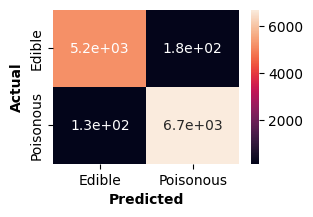

In [ ]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

In [ ]:
#

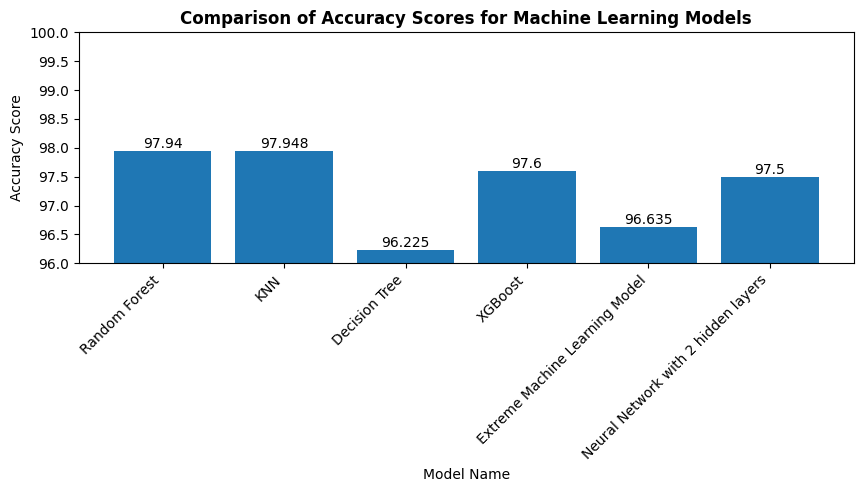

In [ ]:
# Comparison of machine learning models with selected features from Step 2
# The
mlmodel_names = ["Random Forest","KNN","Decision Tree","XGBoost","Extreme Machine Learning Model","Neural Network with 2 hidden layers"]
mlmodel_acc = [97.940, 97.948, 96.225, round(XGB_Test_PM[0]*100,3), round(accuracy_EML_best,3), round((NN_Test_PM[0]*100),3)]

# Plot the bar graph using matplotlib
fig = plt.figure(figsize=(10, 3))
bars = plt.bar(mlmodel_names, mlmodel_acc)
plt.title('Comparison of Accuracy Scores for Machine Learning Models', fontsize=12, fontweight='bold')
plt.xlabel('Model Name')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.ylim([96, 100])
#plt.tight_layout()
# Adding value labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.show()




Observations: Random Forest, KNN, and XGBoost are found to be giving high accuracy. So these three models are considered for ensembling

## Ensemble model with Random Forest, KNN and XGBoost

In [ ]:
# Define top three machine learning in accuracy for ensembling
M1 = RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf = 1, max_depth= 30)
M2 = KNeighborsClassifier(weights ='distance', p = 1, n_neighbors = 7)
M3 = XGBClassifier(n_estimators=1000 ,random_state=42)

# Assign weights to three machine learning models
eclf = VotingClassifier(estimators=[('rf', M1 ), ('knn', M2), ('xgb', M3)], voting='hard', weights=[4,4,2])

# Fir the model
eclf.fit(X_train_selected, y_train)

#Model fit with trainig data
y_train_ensemble_predict = eclf.predict(X_train_selected)

#Model predictions on the test data
y_pred_ensemble = eclf.predict(X_test_selected)

In [ ]:
# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_ensemble_predict)
Test_PM = Perf_Metric(y_test,y_pred_ensemble)

Ensemble_Train_PM = Train_PM
Ensemble_Test_PM = Test_PM

In [ ]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.996,0.996,0.999,0.993
1,Test,0.981,0.983,0.983,0.983
